# Homework 1: Time Series Analysis
## EDS 296

Author: Michelle Yiv

[Link to github repository](https://github.com/mmyiv/eds296-homework1)

## Setup

### Import packages


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

import pandas as pd
import numpy as np

## Locate data

Open the catalog and list all models

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Search through catalog, find all historical simulations
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

# Get unique model names in the set of search results
models = res_df.source_id.unique()

# Print list of model names
print(models)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


In [3]:
# Find historical simulations from two models
res_can = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CanESM5")
res_ces = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CESM2")

# Convert these to dataframes
res_can_df = res_can.df
res_ces_df = res_ces.df

# Print all unique ensemble members ("member_id")
members_can = res_can_df.member_id.unique()
members_ces = res_ces_df.member_id.unique()

print(members_can)

['r24i1p1f1' 'r25i1p1f1' 'r14i1p1f1' 'r2i1p1f1' 'r17i1p1f1' 'r10i1p1f1'
 'r13i1p1f1' 'r7i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r3i1p1f1' 'r22i1p1f1'
 'r23i1p1f1' 'r8i1p1f1' 'r11i1p1f1' 'r12i1p1f1' 'r15i1p1f1' 'r19i1p1f1'
 'r16i1p1f1' 'r1i1p1f1' 'r9i1p1f1' 'r18i1p1f1' 'r4i1p1f1' 'r21i1p1f1'
 'r20i1p1f1' 'r11i1p2f1' 'r10i1p2f1' 'r7i1p2f1' 'r9i1p2f1' 'r8i1p2f1'
 'r4i1p2f1' 'r40i1p2f1' 'r3i1p2f1' 'r6i1p2f1' 'r24i1p2f1' 'r13i1p2f1'
 'r12i1p2f1' 'r5i1p2f1' 'r31i1p2f1' 'r30i1p2f1' 'r32i1p2f1' 'r29i1p2f1'
 'r28i1p2f1' 'r2i1p2f1' 'r22i1p2f1' 'r23i1p2f1' 'r26i1p2f1' 'r27i1p2f1'
 'r25i1p2f1' 'r37i1p2f1' 'r38i1p2f1' 'r39i1p2f1' 'r35i1p2f1' 'r34i1p2f1'
 'r36i1p2f1' 'r33i1p2f1' 'r1i1p2f1' 'r18i1p2f1' 'r19i1p2f1' 'r14i1p2f1'
 'r15i1p2f1' 'r17i1p2f1' 'r16i1p2f1' 'r21i1p2f1' 'r20i1p2f1']


In [4]:
print(members_ces)

# Both these models have r10i1p1f1, so we are good to go!

['r4i1p1f1' 'r3i1p1f1' 'r2i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r1i1p1f1'
 'r7i1p1f1' 'r9i1p1f1' 'r8i1p1f1' 'r10i1p1f1' 'r11i1p1f1']


### Specify search terms to query catalog for CanESM5 and EC-Earth3 data
- activity_id: which project do you want? CMIP = historical data
- source_id: which model do you want? 
- experiment_id: what experimental configuration do you want? Here we want historical
- member_id: which ensemble member do you want? Here we want r10i1p1f1
- table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere datavariable_id: which climate variable do you want? Here we want surface air temperature

### Variables of interest
- Surface air temperature (tas)
- Precipitation (pr)

In [5]:
# Specify search terms

# CanESM5 
activityid = ['CMIP']
sourceid_can = ['CanESM5']
experimentid = ['historical']
memberid = 'r10i1p1f1'
tableid = 'Amon'
variableid = ['tas', 'pr']

# CESM2
sourceid_ces = ['CESM2']

In [6]:
# Search through catalog & store results for both models 
res_can = catalog.search(
    activity_id=activityid,
    source_id=sourceid_can,
    experiment_id=experimentid,
    member_id=memberid,
    table_id=tableid,
    variable_id=variableid)

res_ces = catalog.search(
    activity_id=activityid,
    source_id=sourceid_ces,
    experiment_id=experimentid,
    member_id=memberid,
    table_id=tableid,
    variable_id=variableid)

In [7]:
# Show both model results as a dataframe
display(res_can.df)
display(res_ces.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20200124


In [8]:
# Read in just the historical data file
hist_tas_can = xr.open_zarr(res_can.df['zstore'][1], storage_options={'anon': True})
hist_tas_ces = xr.open_zarr(res_ces.df['zstore'][0], storage_options={'anon': True})

## Download data from historical simulation

- Along with corresponding future projection information for two different future emissions
scenarios, for each model

In [9]:
# Specify search terms

# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id_can = ['CanESM5']
source_id_ces = ['CESM2']

# experiment_id: what experimental configuration do you want? 
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'

# variable_id: which climate variables do you want? Here we want surface air temperature and precipitation
variable_ids_tas = 'tas'
variable_ids_pr = 'pr'

In [10]:
# Search through catalog and store results as 4 different variables for the model and variable configs
res_can_tas = catalog.search(activity_id=activity_ids, 
                             source_id=source_id_can, 
                             experiment_id=experiment_ids, 
                             member_id=member_id, 
                             table_id=table_id, 
                             variable_id=variable_ids_tas)

res_can_pr = catalog.search(activity_id=activity_ids, 
                             source_id=source_id_can, 
                             experiment_id=experiment_ids, 
                             member_id=member_id, 
                             table_id=table_id, 
                             variable_id=variable_ids_pr)

res_ces_tas = catalog.search(activity_id=activity_ids, 
                             source_id=source_id_ces, 
                             experiment_id=experiment_ids, 
                             member_id=member_id, 
                             table_id=table_id, 
                             variable_id=variable_ids_tas)

res_ces_pr = catalog.search(activity_id=activity_ids, 
                             source_id=source_id_ces, 
                             experiment_id=experiment_ids, 
                             member_id=member_id, 
                             table_id=table_id, 
                             variable_id=variable_ids_pr)

In [11]:
# Check that historical data and experiment ids all appear and save as df

future_can = res_can_tas.df
future_ces = res_ces_tas.df

# View both
future_can

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [12]:
future_ces

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,ScenarioMIP,NCAR,CESM2,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
2,ScenarioMIP,NCAR,CESM2,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
3,ScenarioMIP,NCAR,CESM2,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
4,ScenarioMIP,NCAR,CESM2,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


In [13]:
# Read information and store as an xarray object. Both historical and ssp585 & ssp245 data

# CanESM5 model

# TAS
res_can_tas_hist = xr.open_zarr(res_can_tas.df['zstore'][0], storage_options={'anon': True})
res_can_tas_ssp585 = xr.open_zarr(res_can_tas.df['zstore'][4], storage_options={'anon': True})
res_can_tas_ssp245 = xr.open_zarr(res_can_tas.df['zstore'][3], storage_options={'anon': True})

# PR
res_can_pr_hist = xr.open_zarr(res_can_pr.df['zstore'][0], storage_options={'anon': True})
res_can_pr_ssp585 = xr.open_zarr(res_can_pr.df['zstore'][4], storage_options={'anon': True})
res_can_pr_ssp245 = xr.open_zarr(res_can_pr.df['zstore'][3], storage_options={'anon': True})

In [14]:
# CESM2 model

# Extract historical, ssp585 and ssp245 data for CES by TAS and PR
res_ces_tas_hist = xr.open_zarr(res_ces_tas.df['zstore'][0], storage_options={'anon': True})
res_ces_tas_ssp585 = xr.open_zarr(res_ces_tas.df['zstore'][4], storage_options={'anon': True})
res_ces_tas_ssp245 = xr.open_zarr(res_ces_tas.df['zstore'][3], storage_options={'anon': True})

# PR
res_ces_pr_hist = xr.open_zarr(res_ces_pr.df['zstore'][0], storage_options={'anon': True})
res_ces_pr_ssp585 = xr.open_zarr(res_ces_pr.df['zstore'][4], storage_options={'anon': True})
res_ces_pr_ssp245 = xr.open_zarr(res_ces_pr.df['zstore'][3], storage_options={'anon': True})

## Choose a region of interest: Cambodia

The region of interest is Cambodia, which is where my parents were born.
The general climate is a tropical wet and try climate. It is humid almost all year round, with a rainy season from May-Oct and a dry season from November to April. There are many tropical rainforests, large agricultural areas, and rivers.
Climate change impacts: I expect to see even warmer temperatures and possible flooding from increased rainfall during the wet season and sea level rise. When we went to visit during the hotter months, some of the fruit 

### Read in surface air temperature datasets
- Then create annually averaged, area-weighted, regionally averaged time series for your region of interest

In [15]:
# Concatenate historical and future projection data

# CAN
can_585 = xr.concat([res_can_tas_hist, res_can_tas_ssp585], dim="time")
can_245 = xr.concat([res_can_tas_hist, res_can_tas_ssp245], dim="time")

# CES
ces_585 = xr.concat([res_ces_tas_hist, res_ces_tas_ssp585], dim="time")
ces_245 = xr.concat([res_can_tas_hist, res_can_tas_ssp245], dim="time")

In [16]:
# Define bounds for cambodia
lat_min, lat_max = 10.4, 14.7
lon_min, lon_max = 102.0, 107.6

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere

# CAN
can_585_lat = (can_585.lat >= lat_min) & (can_585.lat <= lat_max)
can_585_lon = (can_585.lon >= lon_min) & (can_585.lon <= lon_max)

can_245_lat = (can_245.lat >= lat_min) & (can_245.lat <= lat_max)
can_245_lon = (can_245.lon >= lon_min) & (can_245.lon <= lon_max)


# CES
ces_585_lat = (ces_585.lat >= lat_min) & (ces_585.lat <= lat_max)
ces_585_lon = (ces_585.lon >= lon_min) & (ces_585.lon <= lon_max)

ces_245_lat = (ces_245.lat >= lat_min) & (ces_245.lat <= lat_max)
ces_245_lon = (ces_245.lon >= lon_min) & (ces_245.lon <= lon_max)


In [17]:
# Find points where the mask value is True, drop all other points

# CAN
can_585_mask = can_585.where(can_585_lat & can_585_lon, drop=True)
can_245_mask = can_245.where(can_245_lat & can_245_lon, drop=True)

# CES
ces_585_mask = ces_585.where(ces_585_lat & ces_585_lon, drop=True)
ces_245_mask = ces_245.where(ces_245_lat & ces_245_lon, drop=True)

### Find weighted averages for Cambodia

In [18]:
# Define function to generate area weights
def weights(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [19]:
# Weight all variables
# CAN
weight_can_585 = weights(can_585_mask)
weight_can_245 = weights(can_245_mask)

# CES
weight_ces_585 = weights(ces_585_mask)
weight_ces_245 = weights(ces_245_mask)

In [20]:
# Find the avg using lat, lon dimensions to get a time series

# CAN
can_585_avg = weight_can_585.mean(dim=["lat", "lon"])
can_245_avg = weight_can_245.mean(dim=["lat", "lon"])

# CES
ces_585_avg = weight_ces_585.mean(dim=["lat", "lon"])
ces_245_avg = weight_ces_245.mean(dim=["lat", "lon"])

In [21]:
# Check time to try and resolve slice error

# CAM
#can_585_avg.time
#can_245_avg.time

# CES
#ces_585_avg.time
ces_245_avg.time

<xarray.DataArray 'time' (time: 3012)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 2.0
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

## Plot regional time series
Fit a trend line for two different time periods
- historical (1850-2015)
- historical plus future (1850-2100)

Over both of those time periods, is the temperature of your region changing, and is that
change statistically significant?

In [22]:
# Calculate trend lines -- historical + future

# Select tas variable to resolve error
can_585t = can_585_avg.tas
can_245t = can_245_avg.tas

ces_585t = ces_585_avg.tas
ces_245t = ces_245_avg.tas

# Calculate annual mean

# CAN
can_585_mean = can_585t.groupby('time.year').mean(dim='time')
can_245_mean = can_245t.groupby('time.year').mean(dim='time')
# CES
ces_585_mean = ces_585t.groupby('time.year').mean(dim='time')
ces_245_mean = ces_245t.groupby('time.year').mean(dim='time')


# Calculate best-fit parms

# CAN
x_can_585 = np.polyfit(can_585_mean.year, can_585_mean, 1)
x_can_245 = np.polyfit(can_245_mean.year, can_585_mean, 1)
# CES
x_ces_585 = np.polyfit(ces_585_mean.year, can_585_mean, 1)
x_ces_245 = np.polyfit(ces_245_mean.year, can_585_mean, 1)

# Calculate polynomial object using best fit parms

# CAN
trend_can_585 = np.poly1d(x_can_585)
trend_can_245 = np.poly1d(x_can_245)

# CES
trend_ces_585 = np.poly1d(x_ces_585)
trend_ces_245 = np.poly1d(x_ces_245)

In [23]:
# Calculate trend lines -- historical

# Convert time to prevent slicing error
can_585t = can_585_avg.convert_calendar('standard', use_cftime=False)
can_245t = can_245_avg.convert_calendar('standard', use_cftime=False)

ces_585t = ces_585_avg.convert_calendar('standard', use_cftime=False)
ces_245t = ces_245_avg.convert_calendar('standard', use_cftime=False)

# Select a time period of interest
can_585_hist = can_585t.sel(time=slice('1850-01-01', '2015-12-31'))
can_245_hist = can_245t.sel(time=slice('1850-01-01', '2015-12-31'))

ces_585_hist = ces_585t.sel(time=slice('1850-01-01', '2015-12-31'))
ces_245_hist = ces_245t.sel(time=slice('1850-01-01', '2015-12-31'))

# prevent polyfit error
can_585_hist = can_585_hist.tas
can_245_hist = can_245_hist.tas

ces_585_hist = ces_585_hist.tas
ces_245_hist = ces_245_hist.tas

# Find annual mean
can_585_hist_mean = can_585_hist.groupby('time.year').mean(dim='time')
can_245_hist_mean = can_245_hist.groupby('time.year').mean(dim='time')

ces_585_hist_mean = ces_585_hist.groupby('time.year').mean(dim='time')
ces_245_hist_mean = ces_245_hist.groupby('time.year').mean(dim='time')

# Calculate best-fit parms
x_can_585h = np.polyfit(can_585_hist_mean.year, can_585_hist_mean, 1)
x_can_245h = np.polyfit(can_245_hist_mean.year, can_245_hist_mean, 1)

x_ces_585h = np.polyfit(ces_585_hist_mean.year, ces_585_hist_mean, 1)
x_ces_245h = np.polyfit(ces_245_hist_mean.year, ces_245_hist_mean, 1)

# Calculate polynomial object using best fit parms
trend_can_585h = np.poly1d(x_can_585h)
trend_can_245h = np.poly1d(x_can_245h)

trend_ces_585h = np.poly1d(x_ces_585h)
trend_ces_245h = np.poly1d(x_ces_245h)

## Plotting time series

### CANESM5 Models with ssp585 and ssp245 projections

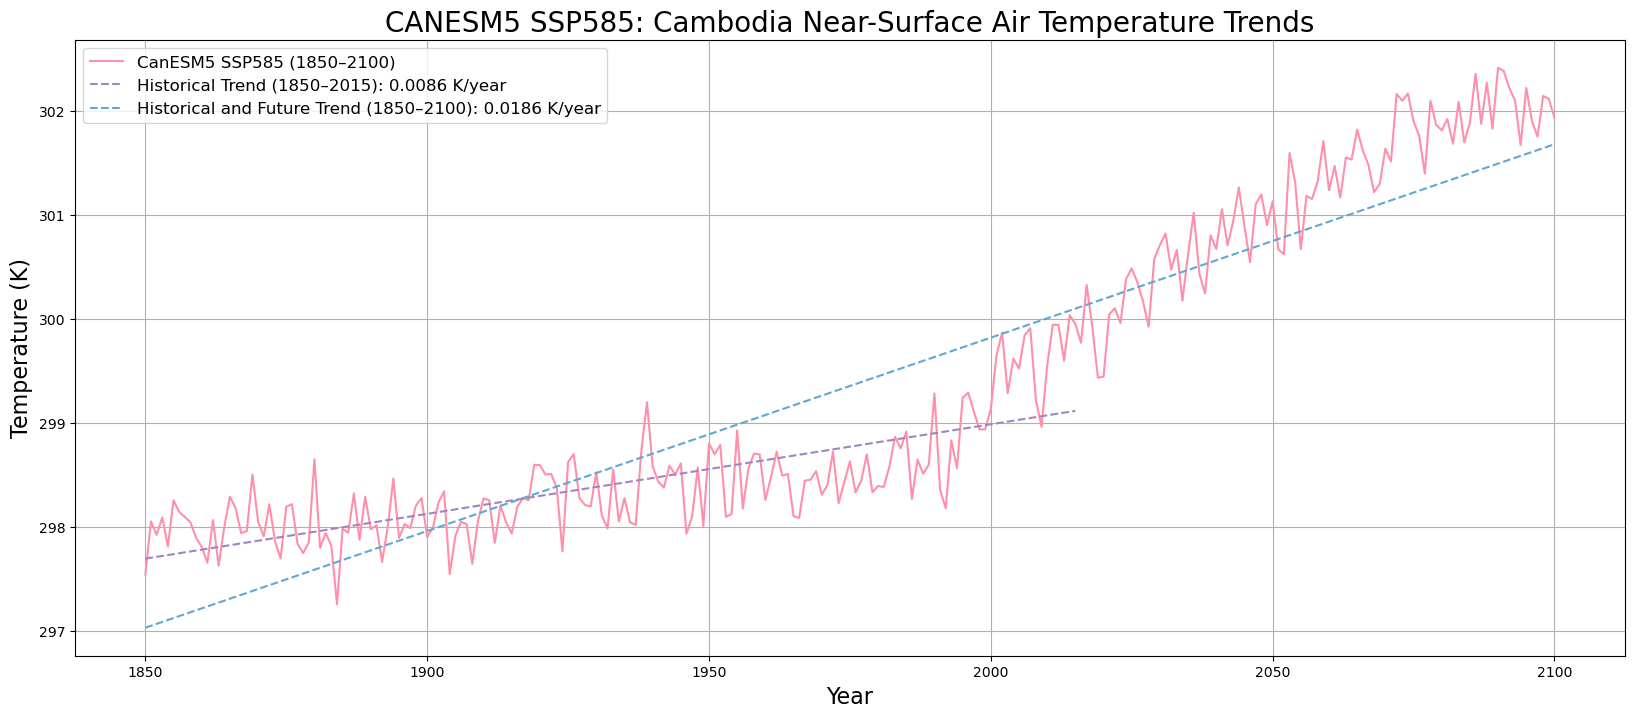

In [24]:
# Initialize figure
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data
ax.plot(can_585_mean.year, can_585_mean, color='#ff8fab', label='CanESM5 SSP585 (1850–2100)')

# Historical trend
ax.plot(can_585_hist_mean.year, trend_can_585h(can_585_hist_mean.year),
        color='#9f86c0', linestyle='--',
        label=f'Historical Trend (1850–2015): {x_can_585h[0]:.4f} K/year')

# Historic and future
ax.plot(can_585_mean.year, trend_can_585(can_585_mean.year),
        color='#5fa8d3', linestyle='--',
        label=f'Historical and Future Trend (1850–2100): {x_can_585[0]:.4f} K/year')

# Labels
ax.set_title("CANESM5 SSP585: Cambodia Near-Surface Air Temperature Trends", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (K)", fontsize=16)

ax.legend(fontsize=12)
ax.grid(True)
plt.show()


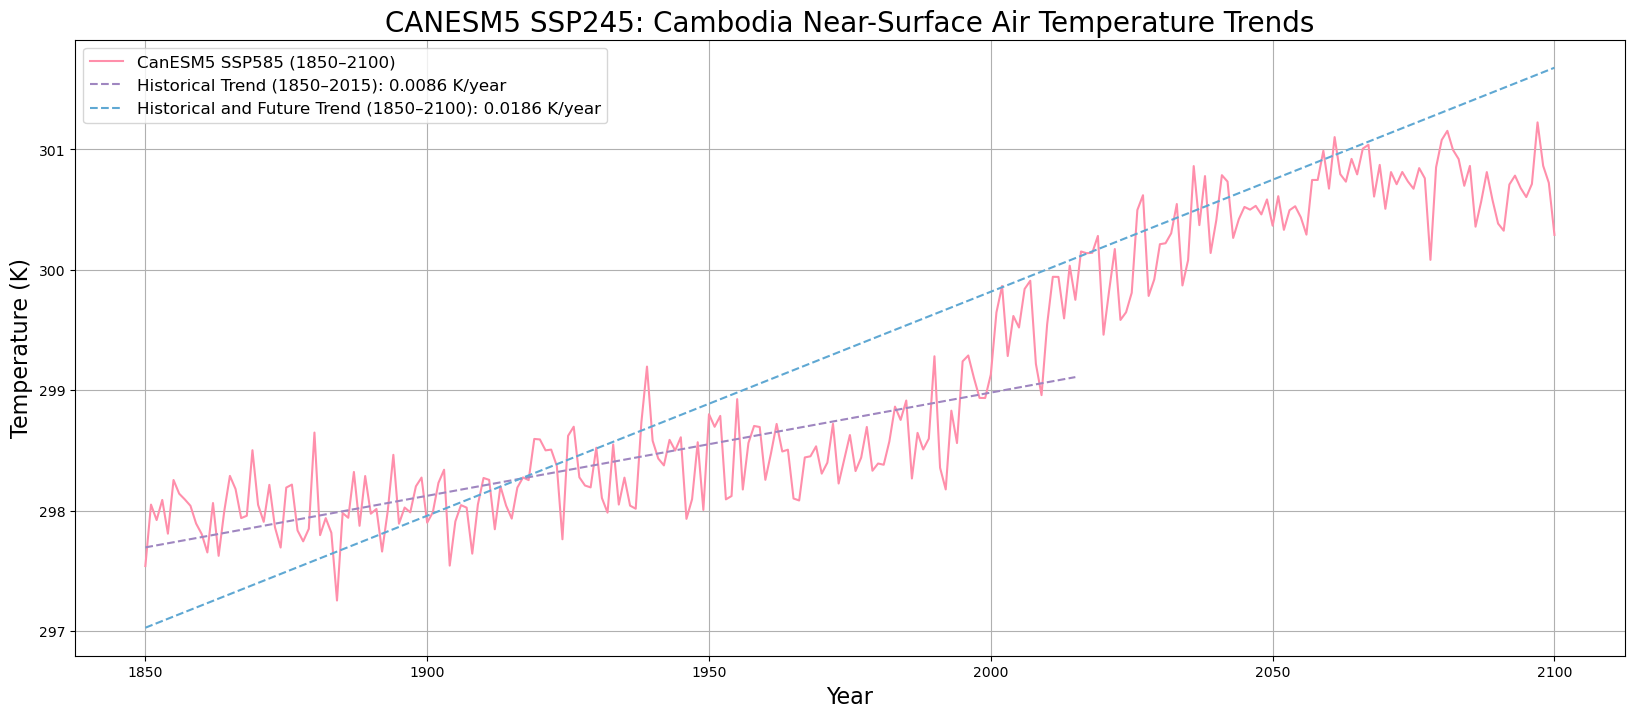

In [25]:
# Initialize figure
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data
ax.plot(can_245_mean.year, can_245_mean, color='#ff8fab', label='CanESM5 SSP585 (1850–2100)')

# Historical trend
ax.plot(can_245_hist_mean.year, trend_can_245h(can_245_hist_mean.year),
        color='#9f86c0', linestyle='--',
        label=f'Historical Trend (1850–2015): {x_can_245h[0]:.4f} K/year')

# Historic and future
ax.plot(can_245_mean.year, trend_can_245(can_245_mean.year),
        color='#5fa8d3', linestyle='--',
        label=f'Historical and Future Trend (1850–2100): {x_can_245[0]:.4f} K/year')

# Labels
ax.set_title("CANESM5 SSP245: Cambodia Near-Surface Air Temperature Trends", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (K)", fontsize=16)

ax.legend(fontsize=12)
ax.grid(True)
plt.show()

## CESM2 Models with ssp585 and ssp245 projections

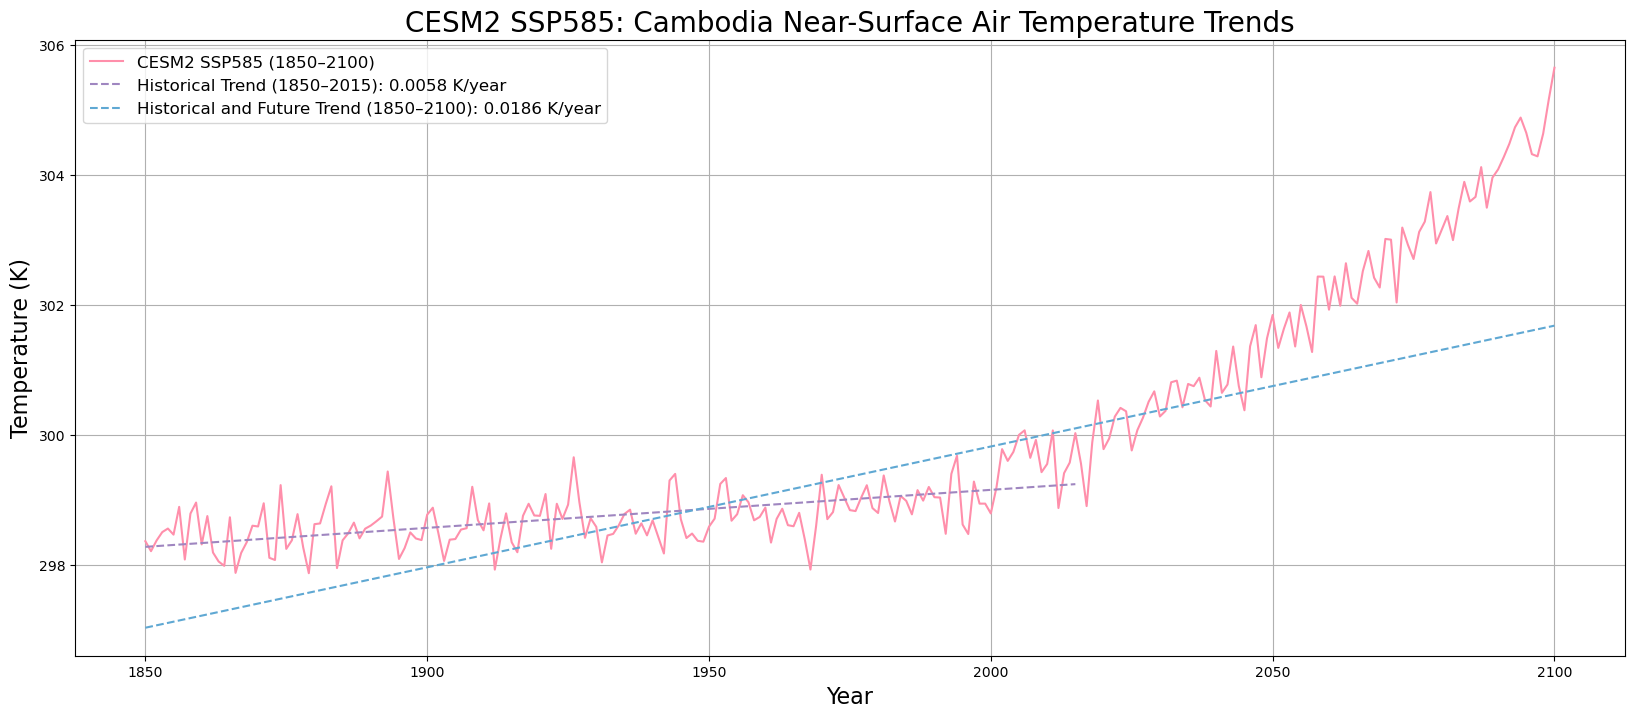

In [26]:
# Initialize figure
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data
ax.plot(ces_585_mean.year, ces_585_mean, color='#ff8fab', label='CESM2 SSP585 (1850–2100)')

# Historical trend
ax.plot(ces_585_hist_mean.year, trend_ces_585h(ces_585_hist_mean.year),
        color='#9f86c0', linestyle='--',
        label=f'Historical Trend (1850–2015): {x_ces_585h[0]:.4f} K/year')

# Historic and future
ax.plot(ces_585_mean.year, trend_ces_585(ces_585_mean.year),
        color='#5fa8d3', linestyle='--',
        label=f'Historical and Future Trend (1850–2100): {x_ces_585[0]:.4f} K/year')

# Labels
ax.set_title("CESM2 SSP585: Cambodia Near-Surface Air Temperature Trends", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (K)", fontsize=16)

ax.legend(fontsize=12)
ax.grid(True)
plt.show()


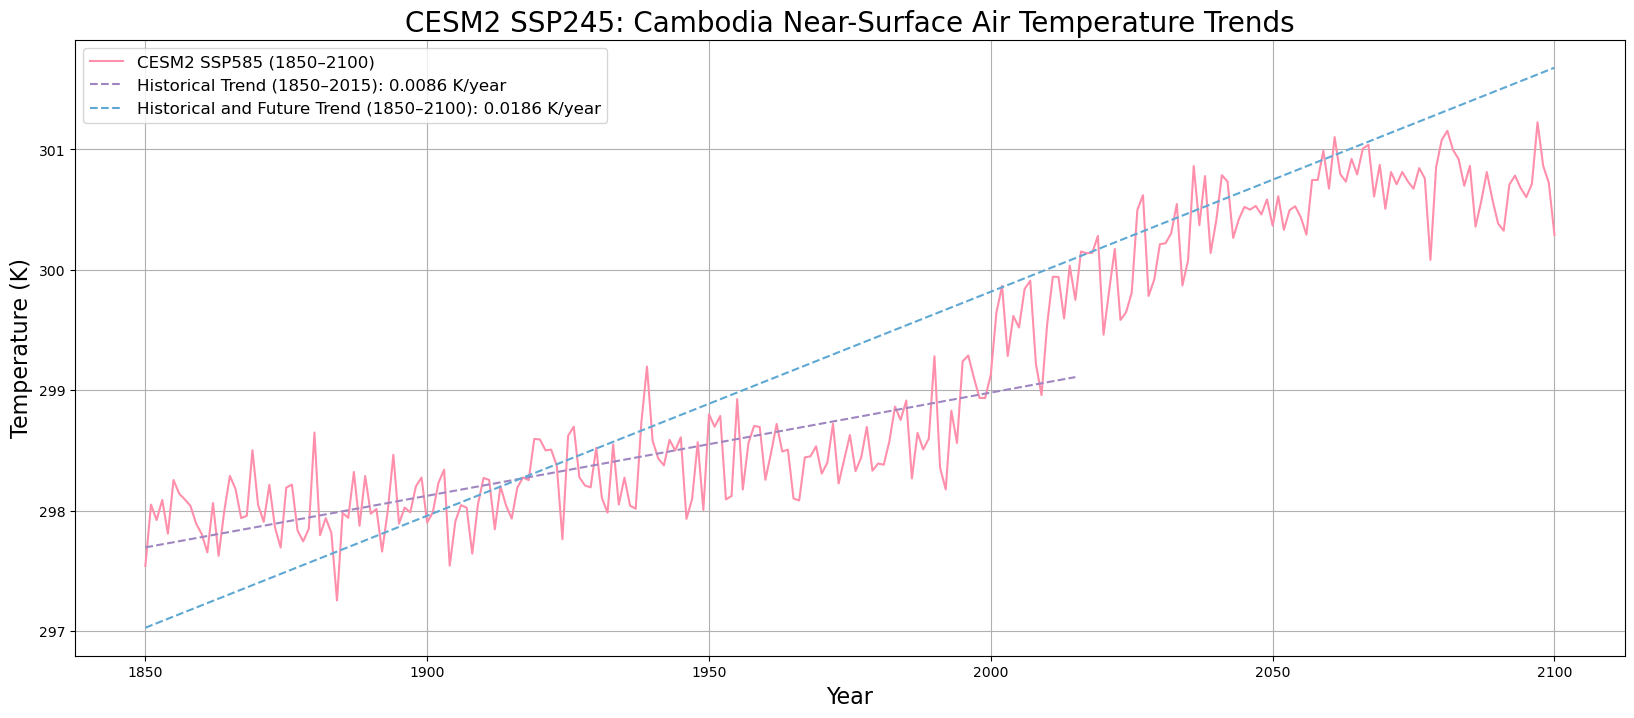

In [27]:
# Initialize figure
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data
ax.plot(ces_245_mean.year, ces_245_mean, color='#ff8fab', label='CESM2 SSP585 (1850–2100)')

# Historical trend
ax.plot(ces_245_hist_mean.year, trend_ces_245h(ces_245_hist_mean.year),
        color='#9f86c0', linestyle='--',
        label=f'Historical Trend (1850–2015): {x_ces_245h[0]:.4f} K/year')

# Historic and future
ax.plot(ces_245_mean.year, trend_ces_245(ces_245_mean.year),
        color='#5fa8d3', linestyle='--',
        label=f'Historical and Future Trend (1850–2100): {x_ces_245[0]:.4f} K/year')

# Labels
ax.set_title("CESM2 SSP245: Cambodia Near-Surface Air Temperature Trends", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (K)", fontsize=16)

ax.legend(fontsize=12)
ax.grid(True)
plt.show()

All trend lines show a positive slope indicating that near-surface air temperature is increasing. The historical and future trend lines have a much steeper slope compared to the historic trends, predicting drastic increases in temperatures in the near future. Looking at the CANESM5 models, the SSP585 projection shows a greater (more exponential?) trend in increasing temperatures after around 2040 compared to the SSP245 projection. These predictions are also relatively similar compared to the CESM2 models, except for the SSP585 projection. This projection ends with a temperature of almost 306K, around 5K more compared to the other models. This model has the most exponential-like curve, and is more prominents in the CESM2 model than in the CANESM5.  Additionally, it also starts with a different temperature compared to other models, at just above 298K rather than 297.5K. These plots all show similar future projections for near surface air temperature, where it will greatly rise in the upcoming years.

Humans in Cambodia are no stranger to the hot and humid climate of the area. However, with this prominent trend in increasing temperatures, crops and livestock may not fare as well, which poses a problem as Cambodia relies heavily on agriculture and fishing to sustain their livelihoods. Some crops are not as heat tolerant which can affect exports to people's everyday meals. Global warming may cause the rainy season to have devastating floods destroying cropland and infrastructure, in addition to the sea level possibly cause damage to coastal cities and islands such as Preah Sihanouk and Koh Rong. Increasing temperatures can be destructive to crop fields anbd fishing potential while exacerbating health risks of working laborious jobs in high temperatures.